# Deep Learning Introduction - Workshop Part 2

In this part of the Introduction Workshop you will (mostly) be on you own! Now it is time to really make use of the introduced building blocks and create you onw network that classifies images of **rock paper scissors** hand gestures.

However, I'll give you a headstart at some parts and I will provide you with additional building blocks and also hidden solutions.

# Imports

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
print('Tensorflow Version ' + tf.__version__)

import datetime, os, glob
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

%load_ext tensorboard

Tensorflow Version 2.5.0


# Dataset

For this workshop we are going to use the **Rock Paper Scissors Dataset** from [this](https://laurencemoroney.com/datasets.html) Website. We can easily download and unzip the files to our colab directory.

In [2]:
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
!unzip -q rps.zip

--2021-06-30 10:49:24--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 172.253.117.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M  79.7MB/s    in 2.4s    

2021-06-30 10:49:26 (79.7 MB/s) - ‘rps.zip’ saved [200682221/200682221]



In [3]:
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
!unzip -q rps-test-set.zip

--2021-06-30 10:49:28--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test-set.zip’

rps-test-set.zip    100%[===================>]  28.15M  69.9MB/s    in 0.4s    

2021-06-30 10:49:29 (69.9 MB/s) - ‘rps-test-set.zip’ saved [29516758/29516758]



Set the folder paths for training and validation images

In [4]:
path_train = 'rps/'
path_val = 'rps-test-set/'

Create a dictionary to transform class strings to numeric values (needed in order to train) and also an inverted dictionary to transform output values into strings

In [5]:
class_value = {'rock':0, 'paper':1, 'scissors':2}
value_class = {v: k for k, v in class_value.items()}

Now we need to read through the folders of training and validation (here named test) images. In the first part of the workshop we created a numpy array containing the whole information of the image files. However, with growing image sizes and numbers, this is no longer viable at some point.

**To-Do**

*   Create a list of file *paths* to each training image.
*   Create a seperate list of corresponding labes as *numeric* values.
*   Take care that the position of corresponding element in the list is the same

**Please use the suggested variable names to make it easier for subsequent modules.**



---


**Hints**

*   Make use of the folder names
*   Use the `class_value` dictionary



In [6]:
path_images_training = []
labels_training = []

--- your code here ---

SyntaxError: ignored

In [7]:
#@title [Hidden] Possible solution

path_images_training = []
labels_training = []
for folder in os.listdir(path_train):
  path = os.path.join(path_train, folder)
  for file in os.listdir(path):
    path_images_training.append(os.path.join(path_train, folder, file))
    labels_training.append(class_value[folder])

We need to do the same for validation files

In [ ]:
path_images_validation = []
labels_validation = []

--- your code here ---

In [8]:
#@title [Hidden] Possible solution

path_images_validation = []
labels_validation = []
for folder in os.listdir(path_val):
  path = os.path.join(path_val, folder)
  for file in os.listdir(path):
    path_images_validation.append(os.path.join(path_val, folder, file))
    labels_validation.append(class_value[folder])

## Data Inspection

Let's now perform a detailed analysis of the data

**To-Do**

*    Open/Read the first image from the list `path_images_training`
*    Check the image properties by plotting min/max values, datatype and the shape
*    Visualize the image
*    Check the corresponding label
*    Find number of samples for both, training and validation

**Please use the suggested variable names to make it easier for subsequent modules.**

---


**Hints**

Use PIL to open the image and matplotlib to visualize it.

In [ ]:
--- your code here ---

n_train_samples = 
n_validation_samples = 

Max: 255
Min: 15
Data Type: uint8
Image shape: (300, 300, 4)


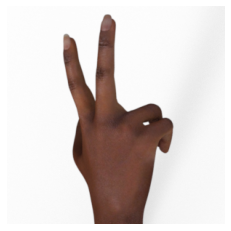

Label: scissors

Number of training samples: 2520
Number of validation samples: 372


In [9]:
#@title [Hidden] Possible solution

img = np.asarray(Image.open(path_images_training[0]))
print('Max:', np.max(img))
print('Min:', np.min(img))
print('Data Type:', img.dtype)
print('Image shape:', img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()
print('Label:', value_class[labels_training[0]])
print('')
n_train_samples = len(labels_training)
print('Number of training samples:', n_train_samples)
n_validation_samples = len(labels_validation)
print('Number of validation samples:', n_validation_samples)


# Dataset Preparation

Now we are going to prepare our dataset using the `tf.data` API.

**To-Do**

*    `get_dataset` function. Here you need to load the dataset (`load_dataset`), shuffle the files, use `map` to parse the images, batch and prefetch the samples.
*    `load_dataset` function similar to the workshop
*    `parser` function which will *read* the image from path and `decode` it. Additionally this function should *resize* the image to e.g. 128x128 and `normalize` it between 0 and 1.

**Please use the suggested variable names to make it easier for subsequent modules.**

---


**Building blocks**

tf.data.Dataset.zip()

tf.data.Dataset.from_tensor_slices()

tf.io.read_file()

tf.image.decode_png()

tf.image.resize()

tf.divide()

dataset.shuffle()

dataset.map()

dataset.batch()

dataset.prefetch()


In [ ]:
BATCH_SIZE = 

def load_dataset(image_file, label_file):
  --- your code here ---
  return dataset 

def parser(path, label):
  --- your code here ---
  return image, label
  
def get_dataset(images, labels, batch_size):
  --- your code here ---
  return dataset

# instantiate the datasets
training_dataset = get_dataset(path_images_training, labels_training, BATCH_SIZE)
validation_dataset = get_dataset(path_images_validation, labels_validation, n_validation_samples)

print('training_dataset:', training_dataset)
print('validation_dataset:', validation_dataset)

In [10]:
#@title [Hidden] Possible solution

BATCH_SIZE = 32

def load_dataset(image_file, label_file):
  dataset = tf.data.Dataset.zip((tf.data.Dataset.from_tensor_slices(image_file), tf.data.Dataset.from_tensor_slices(label_file)))
  return dataset 

def parser(path, label):
  image = tf.io.read_file(path)
  image = tf.image.decode_png(image, channels=3)
  image = tf.image.resize(image, (128, 128))
  image = tf.divide(image, 255)
  return image, label
  
def get_dataset(images, labels, batch_size):
  dataset = load_dataset(images, labels)
  dataset = dataset.shuffle(2000, reshuffle_each_iteration=True)
  dataset = dataset.map(parser, num_parallel_calls=16)
  dataset = dataset.batch(batch_size)
  dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
  return dataset

# instantiate the datasets
training_dataset = get_dataset(path_images_training, labels_training, BATCH_SIZE)
validation_dataset = get_dataset(path_images_validation, labels_validation, n_validation_samples)

print('training_dataset:', training_dataset)
print('validation_dataset:', validation_dataset)

training_dataset: <PrefetchDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int32)>
validation_dataset: <PrefetchDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int32)>


Let's check the dataset iterator

In [ ]:
for image, label in training_dataset:
  print('Image batch:', image.shape)
  print('Label batch:', label.shape)
  break

# Creating the Model

Similar to our model during the first part of the workshop our model here will be a straight sequence (stack) of layers so we can use the tf.keras.Sequential style to create them.

Using the tf.keras.Sequential we need *at least*:

*   Input layer according to our input shape
*   Flatten
*   Output layer according to our output (number of classes)

**Please use the suggested variable names to make it easier for subsequent modules.**


---


**Building blocks**

layers.InputLayer()

layers.Conv2D()

layers.Flatten()

layers.Dense()



In [ ]:
input_shape = 
num_classes = 

model = keras.Sequential(
  [
    --- your code here ---
  ]
)

model.summary()
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
#@title [Hidden] Possible solution

input_shape = [128,128,3]
num_classes = 3

model = keras.Sequential(
  [
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(kernel_size=7, filters=16, padding='same', activation='relu'),
    layers.Conv2D(kernel_size=5, filters=16, strides=2, padding='same', activation='relu'),
    layers.Conv2D(kernel_size=5, filters=16, padding='same', activation='relu'),
    layers.Conv2D(kernel_size=5, filters=32, strides=2, padding='same', activation='relu'),
    layers.Conv2D(kernel_size=5, filters=32, padding='same', activation='relu'),
    layers.Conv2D(kernel_size=5, filters=64, strides=2, padding='same', activation='relu'),
    layers.Conv2D(kernel_size=5, filters=64, padding='same', activation='relu'),
    layers.Conv2D(kernel_size=5, filters=128, strides=2, padding='same', activation='relu'),
    layers.Conv2D(kernel_size=5, filters=128, padding='same', activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(32, activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(num_classes, activation='softmax'),
  ]
)

model.summary()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      2368      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 16)        6416      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 16)        6416      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        12832     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        1

# Training the Model

Now that you have build your dataset and model, let's train!

In [12]:
EPOCHS = 10

logdir = os.path.join('logs', 'cnn_adam_dropout')
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

history = model.fit(training_dataset,
                    epochs=EPOCHS,
                    validation_data=validation_dataset,
                    validation_steps=1,
                    callbacks=[tensorboard_callback])

Epoch 1/10
79/79 [==============================] - 22s 87ms/step - loss: 1.0980 - accuracy: 0.3500 - val_loss: 1.0954 - val_accuracy: 0.4812
Epoch 2/10
79/79 [==============================] - 7s 83ms/step - loss: 0.8851 - accuracy: 0.5667 - val_loss: 0.6105 - val_accuracy: 0.8414
Epoch 3/10
79/79 [==============================] - 6s 78ms/step - loss: 0.4488 - accuracy: 0.8115 - val_loss: 0.3721 - val_accuracy: 0.8441
Epoch 4/10
79/79 [==============================] - 7s 83ms/step - loss: 0.3020 - accuracy: 0.8734 - val_loss: 0.2816 - val_accuracy: 0.8763
Epoch 5/10
79/79 [==============================] - 7s 84ms/step - loss: 0.2374 - accuracy: 0.9079 - val_loss: 0.3072 - val_accuracy: 0.8871
Epoch 6/10
79/79 [==============================] - 7s 84ms/step - loss: 0.1760 - accuracy: 0.9310 - val_loss: 0.3191 - val_accuracy: 0.8656
Epoch 7/10
79/79 [==============================] - 6s 76ms/step - loss: 0.1506 - accuracy: 0.9393 - val_loss: 0.2610 - val_accuracy: 0.9005
Epoch 8/10
7

In [ ]:
%tensorboard --logdir logs

# Evaluating the Model - Inference

If you want to check your models performance, you need to feed images to the predict function.

**To-Do**

*   Inference - Predict output using `model.predict`
*   Visualize the result (or use the proposed solution)

**Please use the suggested variable names to make it easier for subsequent modules.**


In [ ]:
--- your code here ---

image =
label = 
predicted_labels =

In [24]:
#@title [Hidden] Possible solution

for image, label in validation_dataset:
  output = model.predict(image)
  predicted_labels = np.argmax(output, axis=1)

In [14]:
#@title [Hidden] Visalization utilities
'''
utility function to display a row of n images and the prediction/labels
'''

def display_tf_images(input_images, predictions, labels, n_samples, n=1, random=True):
  if random and n_samples != n:
    p = np.random.randint(0, n_samples - n)
  else:
    p = 0
  fig, axs = plt.subplots(1, n, figsize=(13, 3), tight_layout=True)
  if n==1:
    axs = [axs]
  for idx, ax in enumerate(axs):
    img = np.asarray(input_images[p+idx])
    ax.axis('off')
    ax.text(0.5,-0.1, value_class[predictions[p+idx]],
                      size=20,
                      ha='center',
                      transform=ax.transAxes,
                      color='black' if predictions[p+idx] == labels[p+idx] else 'red')
    ax.imshow(img)

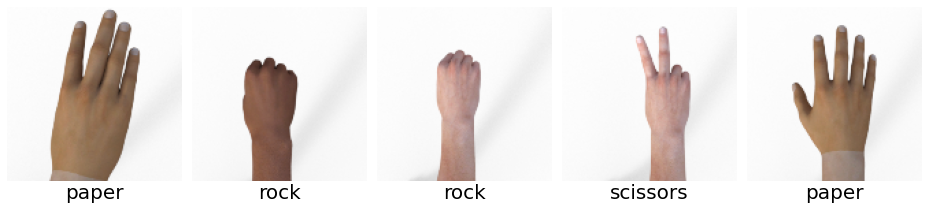

In [27]:
display_tf_images(image.numpy(), predicted_labels, label, n_validation_samples, n=5)

# Inference on Test data

Once you are satisfied with the performance of your network, let's do inference on test data. For test data you can capture your own images!



1.   Click on the folder icon on the left side of colab to extend thee files editor.
2.   Right-click and create a new folder named `test_data`
3.   Use your phone to capture images of your hand over a white surface (e.g. use a paper)
4.   Upload these images to your computer/laptop
5.   Make sure to save or convert the images to `.jpg` (png should also work)
6.   Rename each image to its class e.g. `paper.jpg`
7.   Upload the image files to the `test_data` folder

In [16]:
folder = 'test_data'
image_paths = []
labels = []
for file in os.listdir(folder):
  if file.endswith('.jpg'):
    image_paths.append(os.path.join(folder, file))
    labels.append(class_value[file[:-4]])

Since we have created a quite versatile dataset pipeline, we can use it now to form a dataset given our own images

In [18]:
test_dataset = get_dataset(image_paths, labels, 3)


Use the same code for your inference as above or use the proposed one

In [19]:
#@title [Hidden] Possible solution

for image, label in test_dataset:
  output = model.predict(image)
  predicted_labels = np.argmax(output, axis=1)

display_tf_images(image.numpy(), predicted_labels, label, 3, n=3)